In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from scipy import spatial

In [6]:
train=pd.read_csv('movielenstrain.csv',usecols=[1,2,3])
test=pd.read_csv('movielenstest.csv',usecols=[1,2,3])



In [10]:
import math

In [11]:
import time

In [13]:
K=[i for i in range(1,121)]
error=[0 for i in range(1,121)]
mae=[0 for i in range(1,121)]
gim=[0 for i in range(1,121)]
gpim=[0 for i in range(1,121)]
count_gim=[0 for i in range(1,121)]
count_gpim=[0 for i in range(1,121)]
t1=time.time()
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['movieId'])
    actual=i['rating']
        
    all_ratings_for_the_active_item=train[train['movieId']==mov]
    list_of_movies_current_user_has_rated=train[train['userId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_of_movies_current_user_has_rated.iterrows():
        c1=[]
        c2=[]
        #c_user=int(u['userId'])
        c_item=int(u['movieId'])
        #list_curuser=train[train['userId']==c_user]
        list_curitem=train[train['movieId']==c_item]
        xt=pd.merge( all_ratings_for_the_active_item,list_curitem,how='inner',on=['userId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
    #for k in K:
    cs=0
    numc=0
    for k in K:
        
        if (k-1)>=len(similarity):
            for m in range(k,121):
                error[m-1]+=((actual-predicted)**2)
                mae[m-1]+=(abs(actual-predicted))
                if predicted >3:
                    gpim[m-1]+=(abs(actual-predicted))
                    count_gpim[m-1]+=1
                if actual >3:
                    gim[m-1]+=(abs(actual-predicted))
                    count_gim[m-1]+=1
                
                
                
            break
            
            
            
            
        cs+=similarity[k-1]
        numc+=(similarity[k-1]*corres_rate[k-1])
       
        if cs!=0:
            predicted=numc/cs
        error[k-1]+=((actual-predicted)**2)
        mae[k-1]+=(abs(actual-predicted))
        if predicted >3:
            gpim[k-1]+=(abs(actual-predicted))
            count_gpim[k-1]+=1
        if actual >3:
            gim[k-1]+=(abs(actual-predicted))
            count_gim[k-1]+=1
        
    
    
t2=time.time()        
#print(math.sqrt(error/c))
#print(math.sqrt(error/c))

t2-t1

In [15]:
t2-t1

15.620670318603516

In [14]:
error

[25447.5,
 22982.203160051729,
 22073.615132920826,
 21585.655306756591,
 21284.413201119994,
 21027.194121348832,
 20795.89276728687,
 20556.775998683144,
 20342.688068940857,
 20148.914146650055,
 19942.35808528191,
 19753.144270625697,
 19584.47092780708,
 19414.98551420914,
 19250.371696020004,
 19098.866922515626,
 18937.423447367804,
 18782.93028922343,
 18641.42436662718,
 18516.305019238691,
 18383.885762229198,
 18261.68469696755,
 18131.885387356589,
 18007.387115946731,
 17894.623961586996,
 17788.910274378664,
 17685.397252843446,
 17590.754096839846,
 17495.845595112103,
 17404.344996915999,
 17321.157880587954,
 17229.994690624779,
 17145.238378634691,
 17061.156019151458,
 16982.616173310616,
 16910.256689287013,
 16841.700231218485,
 16771.769257001833,
 16703.16435292855,
 16633.216773275668,
 16568.660871657507,
 16510.128221593564,
 16446.176608657654,
 16386.310508543622,
 16326.111986061474,
 16268.753450238723,
 16215.169781461696,
 16162.264681354387,
 16110.6739

In [15]:
error2=[math.sqrt(i/index) for i in error]

In [16]:
mae2=[i/index for i in mae]



In [18]:
gim2=[i/j for i,j in zip(gim,count_gim)]



In [19]:
gpim2=[i/j for i,j in zip(gpim,count_gpim)]



In [20]:
%matplotlib inline

index

10030

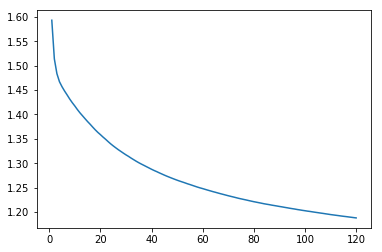

In [21]:
import matplotlib.pyplot as plt

plt.plot(K,error2)

In [22]:
 error2.index(min(error2))

119

In [23]:
min(error2)

1.1881771588369936

In [24]:
mae2.index(min(mae2))

119

In [25]:
min(mae2)

0.86570858964380548

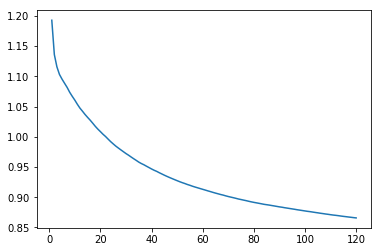

In [26]:
plt.plot(K,mae2)

In [27]:
gim2.index(min(gim2))

53

In [28]:
min(gim2)

0.69599115979518777

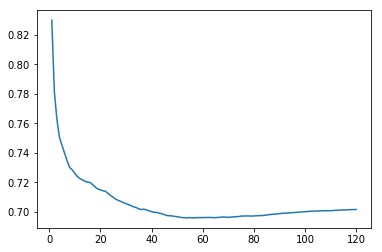

In [29]:
plt.plot(K,gim2)

In [30]:
gpim2.index(min(gpim2))

119

In [31]:
min(gpim2)

0.76307412344826886

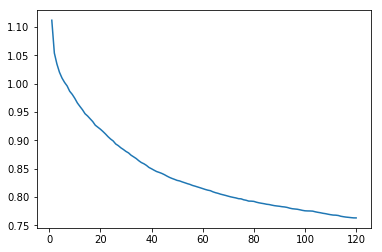

In [32]:
plt.plot(K,gpim2)